In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/Users/mrinaalnahata/CODE/my data learning stuff/my data science stuff/08-Linear-Regression-Models/Advertising.csv')


In [45]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [47]:
len(df)

200

In [268]:
X = df.drop('sales',axis=1)
y = df['sales']

In [270]:
#calculating beta pred
beta = np.empty(shape=(3,))
num = 0
for i in X:
    beta[num] = (np.sum((df[i] - np.mean(df[i]))*(df['sales']-np.mean(df['sales'])))/np.sum((df[i] - np.mean(df[i]))**2))
    num+=1
    

In [145]:
beta.shape

(3,)

In [272]:
beta

array([0.04753664, 0.20249578, 0.0546931 ])

In [155]:
#calculating y-intercept or beta not
test = X.columns
beta_not = np.mean(df['sales'])
for i in range(0,len(beta)):
    beta_not -= beta[i]*np.mean(df[test[i]])



In [157]:
beta_not

0.6506387135641383

In [119]:
X['TV'][0]

230.1

In [159]:
#calculating y cap or y pred
cols = X.columns
y_cap = np.zeros(len(df))
count = 0
for i in range(0,len(df)):
    y_cap[count] = beta_not
    for j in range(0,len(beta)):
        y_cap[count] += beta[j]*X[cols[j]][i]
    count+=1
    

In [161]:
len(y_cap)

200

In [163]:
df['y_cap'] = y_cap

In [165]:
df.head()

,TV,radio,newspaper,sales,y_cap
0,230.1,37.8,69.2,22.1,23.027923
1,44.5,39.3,45.1,10.4,13.190762
2,17.2,45.9,69.3,9.3,14.553057
3,151.5,41.3,58.5,18.5,19.415062
4,180.8,10.8,58.4,12.9,14.626295


In [187]:
#finding cost function
cost_func = (1 / (2 * len(df))) * np.sum((df['sales'] - df['y_cap'])**2)

In [189]:
cost_func

2.258658163524025

In [210]:
#Gradient descent
df = df.drop('y_cap',axis=1)

In [284]:
X = df.drop('sales',axis=1).values
y = df['sales'].values


In [286]:
m,n = X.shape

In [288]:
m,n

(200, 3)

In [290]:
beta = np.zeros(n)

In [292]:
m, n = X.shape  

beta = np.zeros(n)  


alpha = 0.001  
num_iterations = 1000  

first_term = np.zeros(n)  
for i in range(m):  
    for j in range(n):  
        first_term[j] += (y[i] * X[i][j]) / m


second_term = np.zeros(n)  
for i in range(m):  
    for j in range(n):  
        second_term[j] += (X[i][j] * np.sum(beta[k] * X[i][k] for k in range(n))) / m


gradient = first_term - second_term


for j in range(n):
    beta[j] += alpha * gradient[j] 
if np.isnan(beta).any():
    print(f"NaN detected at iteration {iteration}")


/var/folders/8q/s2srwrw50ks7yg3jyqpx6tnr0000gn/T/ipykernel_65363/3956633818.py:23: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  second_term[j] += (X[i][j] * np.sum(beta[k] * X[i][k] for k in range(n))) / m


In [294]:
beta

array([2.4105417 , 0.37063195, 0.45425515])

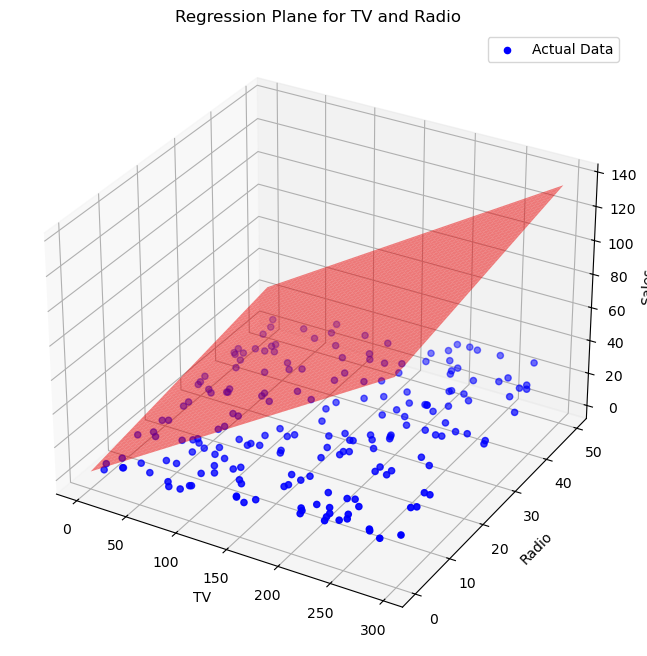

In [296]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Data points
ax.scatter(df['TV'], df['radio'], y, color='blue', label='Actual Data')

# Create a grid for the plane
tv = np.linspace(df['TV'].min(), df['TV'].max(), 100)
radio = np.linspace(df['radio'].min(), df['radio'].max(), 100)
tv, radio = np.meshgrid(tv, radio)

# Predicted sales
sales_pred = beta[0] + beta[1] * tv + beta[2] * radio  # beta[0] is intercept

# Plot the regression plane
ax.plot_surface(tv, radio, sales_pred, color='red', alpha=0.5)

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')
ax.set_title('Regression Plane for TV and Radio')
plt.legend()
plt.show()

SyntaxError: invalid syntax (2830201818.py, line 1)